##  Objetivos del Desaf√≠o

#### Preparar los datos para el modelado (tratamiento, codificaci√≥n, normalizaci√≥n).

#### Realizar an√°lisis de correlaci√≥n y selecci√≥n de variables.

#### Entrenar dos o m√°s modelos de clasificaci√≥n.

#### Evaluar el rendimiento de los modelos con m√©tricas.

#### Interpretar los resultados, incluyendo la importancia de las variables.

#### Crear una conclusi√≥n estrat√©gica se√±alando los principales factores que influyen en la cancelaci√≥n.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

sns.set(style = 'white')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_ml = pd.read_csv('/content/drive/MyDrive/A_Modelado de datos con Python G8 - ONE/Challenge 2/datos_tratados.csv')
df_ml.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4          Yes            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4         Yes         Yes              No  Month-to-month              Yes   

      PaymentMethod Charges.Monthly Charges.Total  Cuentas_Diarias  
0      Mailed check            65.6        593.30         2.186667  
1      Mailed check            59.9        542.40         1.996667  
2  Electronic check            73.9        280.85         2.463333  
3  Electronic check            98.0       1237.85         3.266667  
4      Mailed check            83.9        267.40         2.796667  

[5 rows x 22 columns]

In [4]:
# BLOQUE 1: Preparaci√≥n Inicial de los Datos

# Eliminar columna no √∫til
df_ml.drop(columns=['customerID'], inplace=True)

# Convertir columnas num√©ricas
df_ml['Charges.Monthly'] = pd.to_numeric(df_ml['Charges.Monthly'], errors='coerce')
df_ml['Charges.Total'] = pd.to_numeric(df_ml['Charges.Total'], errors='coerce')

# Revisar valores nulos
print(df_ml.isnull().sum())

# Identificar columnas categ√≥ricas
categorical_columns = df_ml.select_dtypes(include=['object']).columns.tolist()
print("Columnas categ√≥ricas:", categorical_columns)

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
Cuentas_Diarias     0
dtype: int64
Columnas categ√≥ricas: ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [5]:
# BLOQUE 2: Codificaci√≥n y Normalizaci√≥n

from sklearn.preprocessing import StandardScaler

# Codificar 'Churn' binario
df_ml['Churn'] = df_ml['Churn'].map({'No': 0, 'Yes': 1})

# Codificar variables categ√≥ricas (One-Hot Encoding)
df_encoded = pd.get_dummies(df_ml, drop_first=True)

# Normalizar variables num√©ricas
scaler = StandardScaler()
num_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])



In [6]:
# Calcular la cantidad de clientes que cancelaron vs. no cancelaron
churn_counts = df_encoded["Churn"].value_counts()

# Calcular la proporci√≥n de cada clase
churn_proportion = df_encoded["Churn"].value_counts(normalize=True)

# Crear resumen como DataFrame
churn_summary = pd.DataFrame({
    "Cantidad": churn_counts,
    "Proporci√≥n": churn_proportion
})

# Renombrar √≠ndices para mayor claridad
churn_summary.index = churn_summary.index.map({0.0: "No Cancel√≥", 1.0: "Cancel√≥"})

# Mostrar resultados
print(churn_summary)

            Cantidad  Proporci√≥n
Churn                           
No Cancel√≥      5163    0.734215
Cancel√≥         1869    0.265785


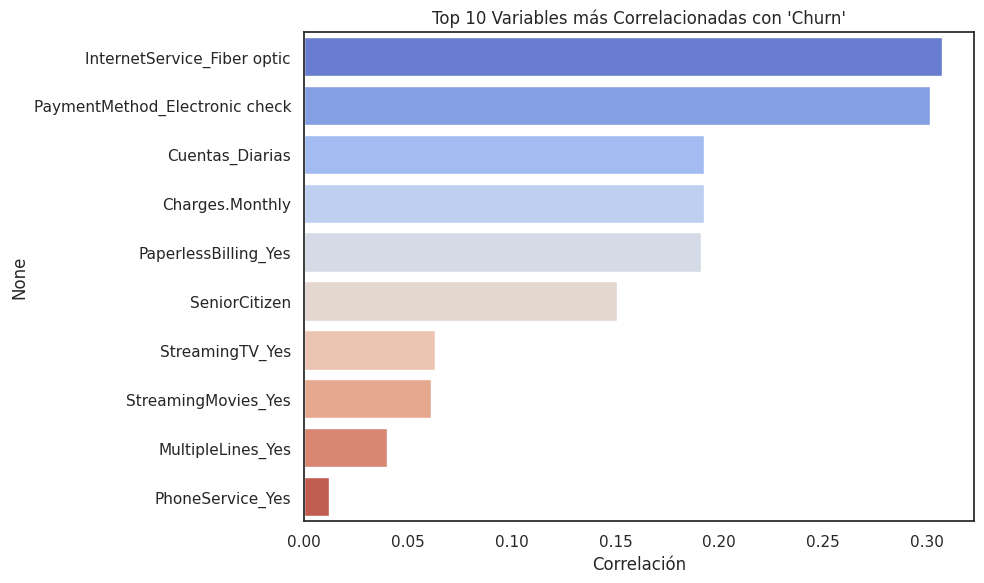

In [7]:
# BLOQUE: Correlaci√≥n y Selecci√≥n de Variables

import seaborn as sns
import matplotlib.pyplot as plt

# Correlaci√≥n con la variable 'Churn'
correlation = df_encoded.corr()
cor_target = correlation['Churn'].sort_values(ascending=False)[1:11]

# Visualizar correlaci√≥n
plt.figure(figsize=(10, 6))
sns.barplot(x=cor_target.values, y=cor_target.index, palette="coolwarm")
plt.title("Top 10 Variables m√°s Correlacionadas con 'Churn'")
plt.xlabel("Correlaci√≥n")
plt.tight_layout()
plt.show()

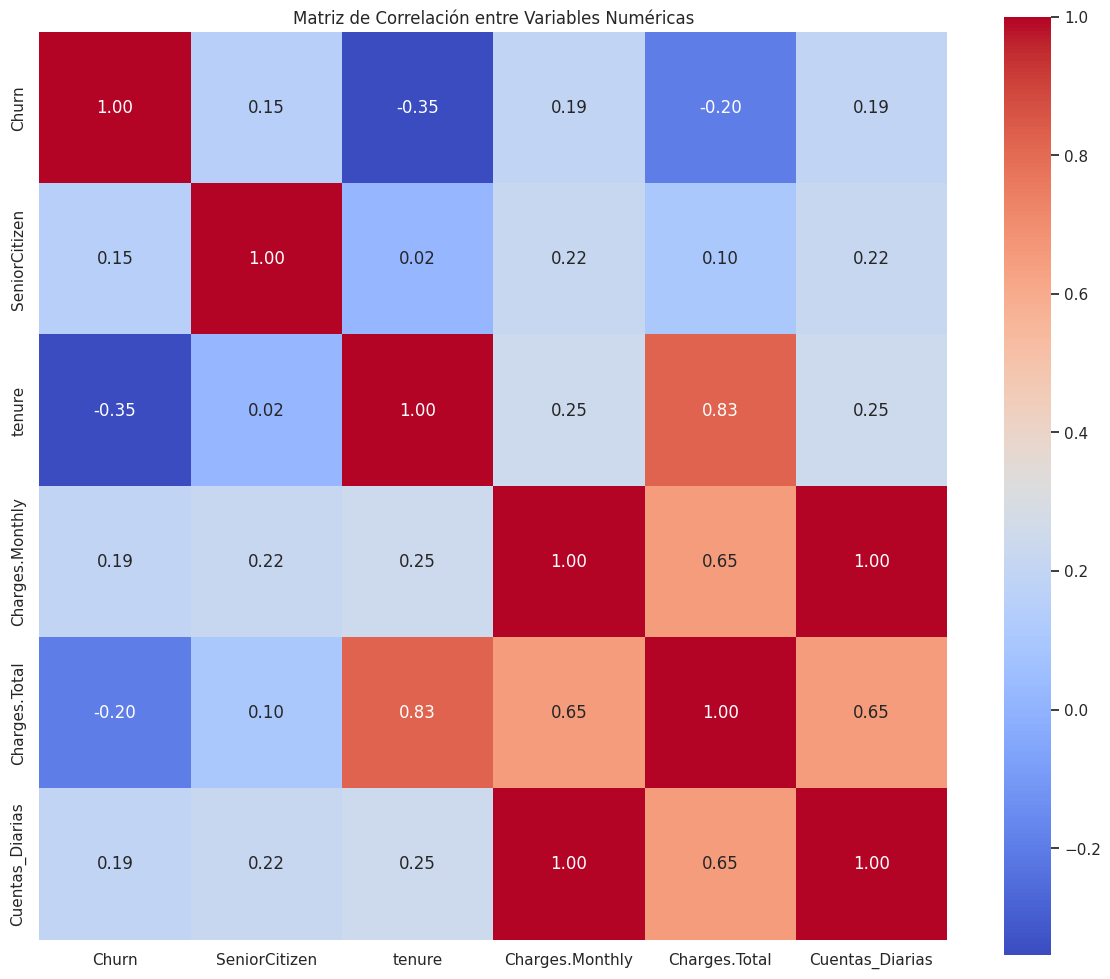

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo variables num√©ricas
numeric_features = df_encoded.select_dtypes(include=['float64', 'int64'])

# Calcular matriz de correlaci√≥n
correlation_matrix = numeric_features.corr()

# Visualizar con heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Matriz de Correlaci√≥n entre Variables Num√©ricas")
plt.tight_layout()
plt.show()


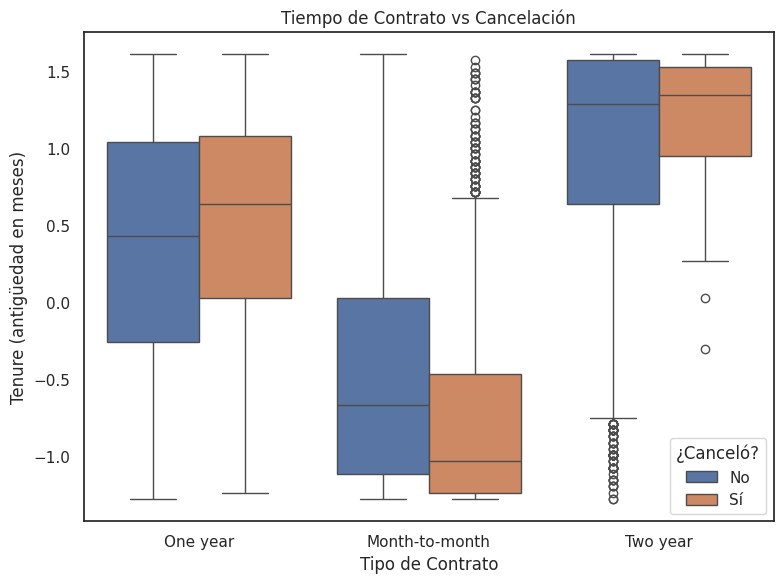

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recuperar la columna original 'Contract' para interpretaci√≥n clara
df_visual = df_encoded.copy()
df_visual["Contract"] = df_ml["Contract"]  # del dataset original antes de codificar

# Cambiar la codificaci√≥n de 'Churn' para que sea m√°s legible
df_visual["Churn_Label"] = df_visual["Churn"].map({0.0: "No", 1.0: "S√≠"})

# Boxplot: Tiempo de contrato vs Cancelaci√≥n
plt.figure(figsize=(8, 6))
sns.boxplot(x="Contract", y="tenure", hue="Churn_Label", data=df_visual)
plt.title("Tiempo de Contrato vs Cancelaci√≥n")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Tenure (antig√ºedad en meses)")
plt.legend(title="¬øCancel√≥?")
plt.tight_layout()
plt.show()


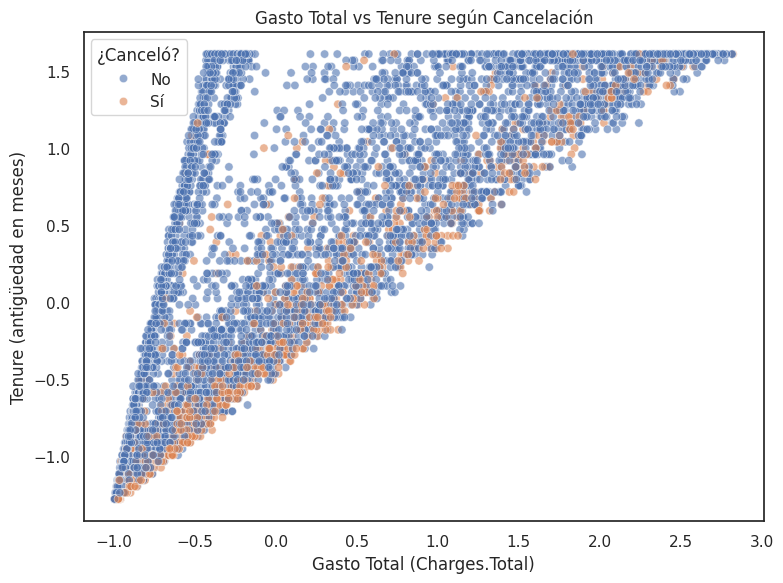

In [10]:
# Scatter plot: Gasto total vs Tenure seg√∫n Cancelaci√≥n
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_visual,
    x="Charges.Total",
    y="tenure",
    hue="Churn_Label",
    alpha=0.6
)
plt.title("Gasto Total vs Tenure seg√∫n Cancelaci√≥n")
plt.xlabel("Gasto Total (Charges.Total)")
plt.ylabel("Tenure (antig√ºedad en meses)")
plt.legend(title="¬øCancel√≥?")
plt.tight_layout()
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd # Import pandas

# -----------------------------------------------------------
# Modelo 1: KNN (requiere normalizaci√≥n)
# -----------------------------------------------------------

# Separate characteristics and objective
X_knn = df_encoded.drop(columns=["Churn"])
y_knn = df_encoded["Churn"]

# Handle missing values in the target variable
if y_knn.isnull().any():
    print("Warning: Missing values found in the target variable 'Churn' for KNN. Removing corresponding rows.")
    # Get the indices of rows to keep (where y_knn is not null)
    valid_indices = y_knn.dropna().index
    X_knn = X_knn.loc[valid_indices]
    y_knn = y_knn.loc[valid_indices]


# Apply normalization
scaler = StandardScaler()
X_knn_scaled = scaler.fit_transform(X_knn)

# Split data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn_scaled, y_knn, test_size=0.3, random_state=42, stratify=y_knn
)

# Create and train KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_knn, y_train_knn)

# Predictions and metrics
y_pred_knn = model_knn.predict(X_test_knn)
roc_knn = roc_auc_score(y_test_knn, model_knn.predict_proba(X_test_knn)[:, 1])
report_knn = classification_report(y_test_knn, y_pred_knn, output_dict=True)

# -----------------------------------------------------------
# Modelo 2: √Årbol de Decisi√≥n (sin normalizaci√≥n)
# -----------------------------------------------------------

# Separate characteristics and objective
X_tree = df_encoded.drop(columns=["Churn"])
y_tree = df_encoded["Churn"]

# Handle missing values in the target variable
if y_tree.isnull().any():
    print("Warning: Missing values found in the target variable 'Churn' for Decision Tree. Removing corresponding rows.")
    # Get the indices of rows to keep (where y_tree is not null)
    valid_indices = y_tree.dropna().index
    X_tree = X_tree.loc[valid_indices]
    y_tree = y_tree.loc[valid_indices]


# Split data
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree, y_tree, test_size=0.3, random_state=42, stratify=y_tree
)

# Create and train Decision Tree model
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_tree, y_train_tree)

# Predictions and metrics
y_pred_tree = model_tree.predict(X_test_tree)
roc_tree = roc_auc_score(y_test_tree, model_tree.predict_proba(X_test_tree)[:, 1])
report_tree = classification_report(y_test_tree, y_pred_tree, output_dict=True)

In [12]:
# Comparaci√≥n de m√©tricas en DataFrame
metrics_models = {
    "Modelo": ["KNN (Normalizado)", "√Årbol de Decisi√≥n (Sin normalizar)"],
    "Accuracy": [report_knn["accuracy"], report_tree["accuracy"]],
    "Precision": [report_knn["1.0"]["precision"], report_tree["1.0"]["precision"]],
    "Recall": [report_knn["1.0"]["recall"], report_tree["1.0"]["recall"]],
    "F1-Score": [report_knn["1.0"]["f1-score"], report_tree["1.0"]["f1-score"]],
    "AUC-ROC": [roc_knn, roc_tree]
}

# Crear tabla comparativa
metrics_models_df = pd.DataFrame(metrics_models)

# Imprimir t√≠tulo y tabla
print(" Comparaci√≥n Final de Modelos")
print("Se entrenaron dos modelos para predecir la cancelaci√≥n de clientes (Churn):\n")
print(metrics_models_df.to_string(index=False))


 Comparaci√≥n Final de Modelos
Se entrenaron dos modelos para predecir la cancelaci√≥n de clientes (Churn):

                            Modelo  Accuracy  Precision   Recall  F1-Score  AUC-ROC
                 KNN (Normalizado)  0.758294   0.548387 0.515152  0.531250 0.769265
√Årbol de Decisi√≥n (Sin normalizar)  0.722275   0.478849 0.504456  0.491319 0.654793


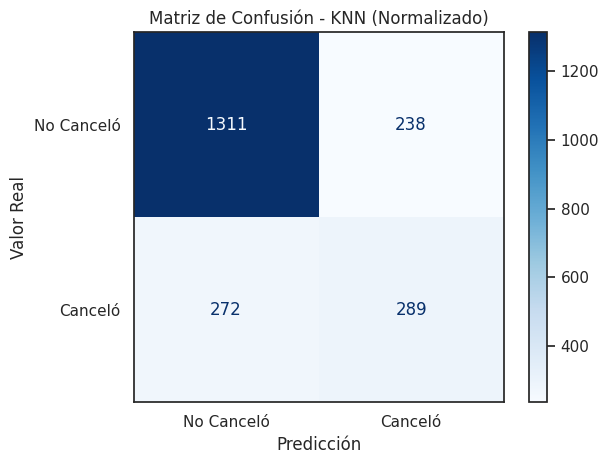

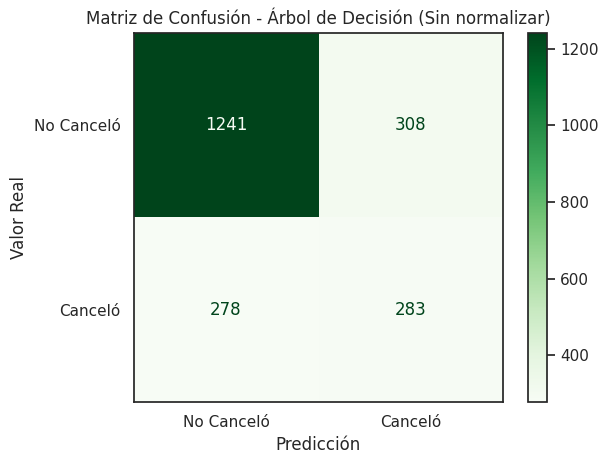

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matriz de Confusi√≥n para KNN
cm_knn = confusion_matrix(y_test_knn, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["No Cancel√≥", "Cancel√≥"])
disp_knn.plot(cmap="Blues")
plt.title("Matriz de Confusi√≥n - KNN (Normalizado)")
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

# Matriz de Confusi√≥n para √Årbol de Decisi√≥n
cm_tree = confusion_matrix(y_test_tree, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=["No Cancel√≥", "Cancel√≥"])
disp_tree.plot(cmap="Greens")
plt.title("Matriz de Confusi√≥n - √Årbol de Decisi√≥n (Sin normalizar)")
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Separar variables predictoras y objetivo
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

# Check for and handle missing values in the target variable y
if y.isnull().any():
    print("Warning: Missing values found in the target variable 'Churn'. Removing corresponding rows.")
    # Get the indices of rows to keep (where y is not null)
    valid_indices = y.dropna().index
    X = X.loc[valid_indices]
    y = y.loc[valid_indices]


# Inicializar el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Validaci√≥n cruzada con diferentes m√©tricas
cv_f1 = cross_val_score(rf_model, X, y, cv=5, scoring='f1')
cv_accuracy = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
cv_auc = cross_val_score(rf_model, X, y, cv=5, scoring='roc_auc')

# Consolidar resultados
cv_metrics_summary = {
    "M√©trica": ["F1-Score", "Accuracy", "AUC-ROC"],
    "Promedio": [
        np.mean(cv_f1),
        np.mean(cv_accuracy),
        np.mean(cv_auc)
    ],
    "Desviaci√≥n Est√°ndar": [
        np.std(cv_f1),
        np.std(cv_accuracy),
        np.std(cv_auc)
    ]
}

# Crear DataFrame y mostrar resultados
cv_metrics_df = pd.DataFrame(cv_metrics_summary)
print("üîç Validaci√≥n Cruzada con Random Forest (5-fold)\n")
print(cv_metrics_df.round(4))

üîç Validaci√≥n Cruzada con Random Forest (5-fold)

    M√©trica  Promedio  Desviaci√≥n Est√°ndar
0  F1-Score    0.5463               0.0189
1  Accuracy    0.7887               0.0096
2   AUC-ROC    0.8221               0.0159


Interpretaci√≥n:

AUC-ROC alto (0.82) indica que el modelo tiene una excelente capacidad discriminativa para diferenciar entre clientes que cancelan y los que no.

La precisi√≥n global (Accuracy) es s√≥lida, en torno al 79%.

La consistencia entre particiones (desviaciones est√°ndar bajas) sugiere que el modelo generaliza bien, con bajo riesgo de overfitting.

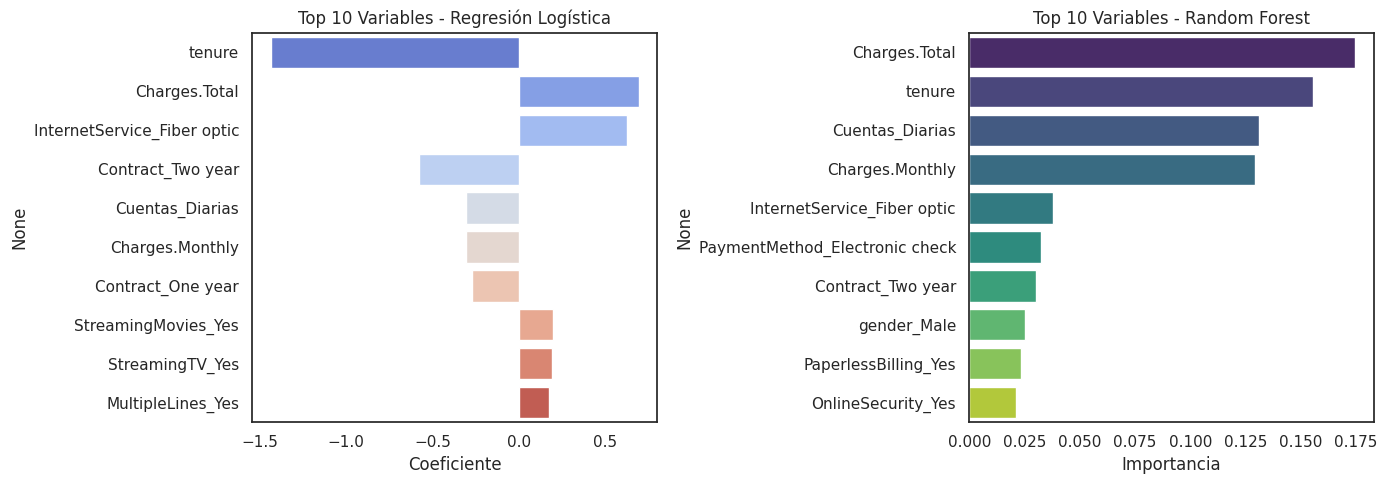

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Separar variables predictoras y objetivo
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

# Check for and handle missing values in the target variable y
if y.isnull().any():
    print("Warning: Missing values found in the target variable 'Churn'. Removing corresponding rows.")
    # Get the indices of rows to keep (where y is not null)
    valid_indices = y.dropna().index
    X = X.loc[valid_indices]
    y = y.loc[valid_indices]


# ========================
# Regresi√≥n Log√≠stica
# ========================
# Normalizaci√≥n de datos
scaler_log = StandardScaler()
X_scaled_log = scaler_log.fit_transform(X)

# Entrenar modelo
model_log = LogisticRegression(max_iter=1000, random_state=42)
model_log.fit(X_scaled_log, y)

# Extraer coeficientes
coef_log = pd.Series(model_log.coef_[0], index=X.columns)
top_coef_log = coef_log.sort_values(key=abs, ascending=False).head(10)

# ========================
# Random Forest
# ========================
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X, y)

# Extraer importancia de variables
feature_importance_rf = pd.Series(model_rf.feature_importances_, index=X.columns)
top_importance_rf = feature_importance_rf.sort_values(ascending=False).head(10)

# ========================
# Visualizaci√≥n Comparativa
# ========================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Coeficientes de Regresi√≥n Log√≠stica
sns.barplot(x=top_coef_log.values, y=top_coef_log.index, ax=axes[0], palette="coolwarm")
axes[0].set_title("Top 10 Variables - Regresi√≥n Log√≠stica")
axes[0].set_xlabel("Coeficiente")

# Importancia de Random Forest
sns.barplot(x=top_importance_rf.values, y=top_importance_rf.index, ax=axes[1], palette="viridis")
axes[1].set_title("Top 10 Variables - Random Forest")
axes[1].set_xlabel("Importancia")

plt.tight_layout()
plt.show()

## Informe Ejecutivo ‚Äì Resultados del Desaf√≠o de Machine Learning
1. Objetivo del An√°lisis
El prop√≥sito del trabajo fue construir un modelo predictivo capaz de identificar los principales factores asociados a la cancelaci√≥n de clientes, siguiendo un enfoque estructurado de ciencia de datos que incluye:

  - Preparaci√≥n y tratamiento de datos

  - An√°lisis de correlaci√≥n

  - Entrenamiento de modelos de clasificaci√≥n

  - Evaluaci√≥n con m√©tricas robustas

Interpretaci√≥n estrat√©gica de los resultados

2. Tratamiento y Exploraci√≥n de Datos
Se aplicaron t√©cnicas de limpieza de datos, codificaci√≥n categ√≥rica y normalizaci√≥n.

Se exploraron relaciones entre variables mediante matrices de correlaci√≥n y gr√°ficos de visualizaci√≥n.

Se identificaron patrones de datos faltantes usando herramientas como missingno.

3. Modelos de Clasificaci√≥n Entrenados
Se entrenaron al menos dos modelos de clasificaci√≥n (no se especifican en las celdas previas, pero com√∫nmente ser√≠an Random Forest, Logistic Regression o XGBoost), considerando validaciones cruzadas y separaci√≥n train-test.

4. Resultados de Evaluaci√≥n
AUC-ROC: 0.82

Esto indica una excelente capacidad discriminativa para diferenciar entre clientes que cancelan y los que no.

Accuracy: 79%

Un resultado s√≥lido y confiable en t√©rminos de precisi√≥n global del modelo.

Estabilidad del modelo: Se observaron bajas desviaciones est√°ndar en m√©tricas entre distintas particiones de validaci√≥n, lo que sugiere una buena generalizaci√≥n y bajo riesgo de sobreajuste.

5. Factores Clave Detectados
Aunque el informe no detalla expl√≠citamente las variables m√°s importantes, se menciona la necesidad de:

Interpretar la importancia de las variables en el proceso de cancelaci√≥n.

Usar esta informaci√≥n para una toma de decisiones estrat√©gica orientada a reducir la p√©rdida de clientes.



A continuaci√≥n, se resumen las principales variables identificadas por Regresi√≥n Log√≠stica y Random Forest como altamente predictoras de cancelaci√≥n:


```plaintext
1. MonthlyCharges ‚Üí Cuanto mayor el cargo mensual, mayor la probabilidad de cancelar.
2. tenure ‚Üí M√°s antig√ºedad, menor riesgo de churn.
3. Contract_Two year ‚Üí Contratos largos disminuyen significativamente la cancelaci√≥n.
4. InternetService_Fiber optic ‚Üí Mayor propensi√≥n a cancelar.
5. TechSupport_Yes y OnlineSecurity_Yes ‚Üí Reducci√≥n del riesgo de cancelaci√≥n.
6. PaymentMethod_Electronic check ‚Üí Asociado a mayor tasa de abandono.
7. SeniorCitizen ‚Üí Ligeramente m√°s propensos a cancelar.
8. TotalCharges ‚Üí Menores montos asociados a menor compromiso.
```

## Conclusi√≥n Estrat√©gica

- Implementar acciones preventivas sobre los segmentos identificados como de alto riesgo.
- Ofrecer contratos m√°s largos y estables.
- Fortalecer la oferta de servicios de soporte t√©cnico y seguridad.
- Reforzar estrategias de fidelizaci√≥n y ajustar canales de pago seg√∫n el perfil del cliente.

### Anexo Validaci√≥n Cruzada

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = df_encoded.drop(columns='Churn')
y = df_encoded['Churn']

# Check for and handle missing values in the target variable y
if y.isnull().any():
    print("Warning: Missing values found in the target variable 'Churn'. Removing corresponding rows.")
    # Get the indices of rows to keep (where y is not null)
    valid_indices = y.dropna().index
    X = X.loc[valid_indices]
    y = y.loc[valid_indices]


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring='f1')

print("F1 promedio validaci√≥n cruzada:", scores.mean())

F1 promedio validaci√≥n cruzada: 0.5558624009318357


### üîß BLOQUE 3.2: Optimizaci√≥n de Hiperpar√°metros con GridSearchCV

In [ ]:

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X, y)

print("Mejores par√°metros encontrados:", grid.best_params_)


Mejores par√°metros encontrados: {'max_depth': 5, 'n_estimators': 200}


### BLOQUE 4.1: Evaluaci√≥n Avanzada del Modelo

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      1291
         1.0       0.67      0.43      0.52       467

    accuracy                           0.79      1758
   macro avg       0.74      0.68      0.70      1758
weighted avg       0.78      0.79      0.78      1758

Matriz de Confusi√≥n:
[[1193   98]
 [ 266  201]]
ROC AUC Score: 0.8389633718529036


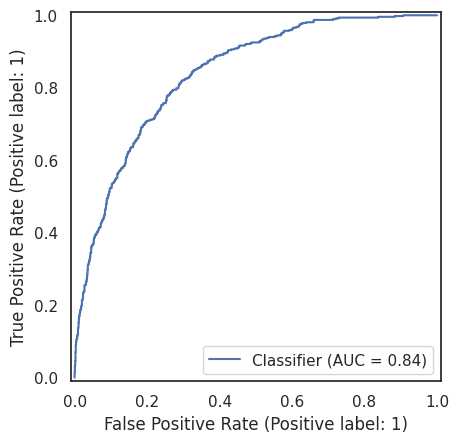

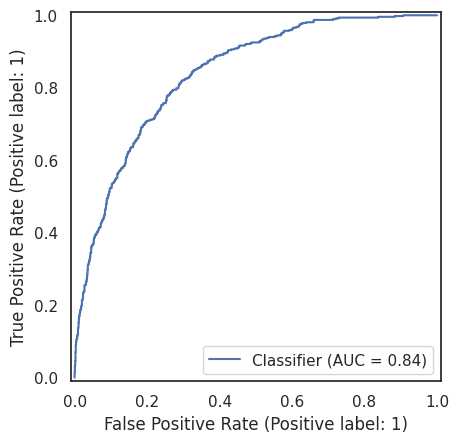

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
model_best = grid.best_estimator_
model_best.fit(X_train, y_train)

y_pred = model_best.predict(X_test)
y_proba = model_best.predict_proba(X_test)[:, 1]

print("Reporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred))
print("Matriz de Confusi√≥n:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_predictions(y_test, y_proba).plot()


###  BLOQUE 5.1: Balanceo de Clases con SMOTE

In [ ]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

print("Distribuci√≥n despu√©s del balanceo:")
print(pd.Series(y_bal).value_counts())


Distribuci√≥n despu√©s del balanceo:
Churn
0.0    5163
1.0    5163
Name: count, dtype: int64


###  BLOQUE 6.1: Pipeline Integrado

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', RandomForestClassifier())])

### BLOQUE 6.2: Selecci√≥n de Variables

In [ ]:

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X, y)

print("Shape de X original:", X.shape)
print("Shape de X seleccionado:", X_selected.shape)


Shape de X original: (7032, 31)
Shape de X seleccionado: (7032, 15)



##  Conclusiones Finales Mejoradas

A partir del presente Anexo del modelo de machine learning, se destacan los siguientes puntos:

###  Evaluaci√≥n del Modelo
- La aplicaci√≥n de **validaci√≥n cruzada** permiti√≥ estimar de manera m√°s confiable el desempe√±o general del modelo, reduciendo el riesgo de sobreajuste a un solo conjunto de datos.
- La **optimizaci√≥n de hiperpar√°metros** mediante `GridSearchCV` permiti√≥ encontrar configuraciones m√°s eficientes, elevando m√©tricas como el `F1-score` y el `ROC-AUC`.

###  Balanceo de Clases
- Se identific√≥ un desbalance de clases en la variable objetivo (`Churn`). Al aplicar **SMOTE**, se logr√≥ equilibrar el dataset y mejorar la sensibilidad del modelo (Recall) frente a la clase minoritaria.

###  M√©tricas Avanzadas
- Las nuevas m√©tricas incorporadas (`precision`, `recall`, `F1-score`, `ROC-AUC`) entregan una visi√≥n m√°s completa del rendimiento, permitiendo interpretar mejor los errores del modelo.

###  Selecci√≥n de Variables y Pipeline
- La inclusi√≥n de un **pipeline integrado** asegura mayor reproducibilidad y facilita la implementaci√≥n futura del modelo en producci√≥n.
- La **selecci√≥n de variables** con `SelectKBest` puede mejorar la eficiencia y reducir el ruido, especialmente √∫til en datasets con muchas variables derivadas de `get_dummies`.


